# Basic Time Series Models - Lab

## Introduction

Now that you have an initial understanding of the the White Noise and the Random Walk model, let's try to generate some examples!

## Objectives

You will be able to:
- Explain what the goal is of time series modeling
- Understand and explain what a White Noise model is
- Understand and explain what a Random Walk model is
- Understand the mathematical formulations of Random Walk and White Noise models

## A White Noise Model

To get a good sense of how a model works, it is always a good idea to generate a process. Let's consider the following example:
- Every day in August, September and October 2018, Nina takes the subway to work. Let's ignore weekends for now and assume that Nina works every day.
- We know that on average, it takes her 25 minutes, and the standard deviation is 4 minutes. 
- Create and visualize a time series that reflects this information.

Let's import pandas, numpy and matplotlib.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


np.random.seed(12) # do not change this seed.

Create the dates. You can do this using `pd.date_range`, more info [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.date_range.html).

In [5]:
# your code here
dates = pd.date_range('2018-08-01','2018-10-31')
dates.shape

(92,)

Generate the values for the wite noise process representing Nina's commute in August and September.

In [7]:
# your code here
commute = np.random.normal(25, 4, len(dates))
commute.shape

(92,)

Create a time series with the dates and the commute times.

In [15]:
# your code here
time_series = pd.DataFrame(commute, index=dates, columns=['commute time'])
time_series

,commute time
2018-08-01,22.752461
2018-08-02,20.470125
2018-08-03,26.097164
2018-08-04,27.943648
2018-08-05,26.737275
...,...
2018-10-27,25.898188
2018-10-28,20.346132
2018-10-29,12.936338
2018-10-30,27.375878


Visualize the time series and set appropriate axis labels.

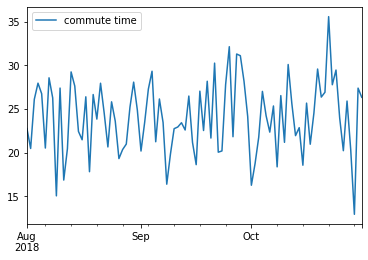

In [16]:
# your code here
time_series.plot()

Print Nina's shortest and longest commute.

In [18]:
# your code here
display(time_series.min(), time_series.max())

commute time    12.936338
dtype: float64

commute time    35.556184
dtype: float64

Look at the distribution of commute times.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116101fd0>]],
      dtype=object)

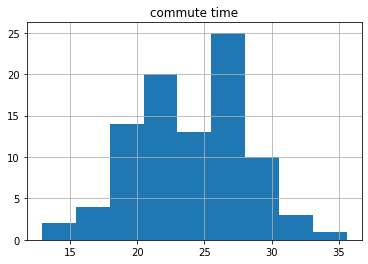

In [20]:
# your code here
time_series.hist(bins='auto')

Compute the standard deviation and the mean of the commute series. The fact that the mean and standard error are constant over time is crucial!

In [22]:
# your code here
display(time_series.mean(), time_series.std())

commute time    24.040034
dtype: float64

commute time    4.139208
dtype: float64

Now, let's look at the mean and standard error for August and October respectively. 

In [27]:
# your code here
display(time_series[time_series.index.month == 8].mean(), 
        time_series[time_series.index.month == 8].std(),
        time_series[time_series.index.month == 10].mean(),
        time_series[time_series.index.month == 10].std(),
       )

commute time    23.733632
dtype: float64

commute time    3.769916
dtype: float64

commute time    24.017794
dtype: float64

commute time    4.590003
dtype: float64

In [ ]:
# your code here

Because you've generated this data, you know that the mean and constant will be the same over time. But comparing mean and standard deviation over time is useful practice for real data examples to check if a process is White Noise!

## A Random Walk Model

Remember from the lecture that the Random Walk Model:

- Has no specified mean or variance
- Has a strong dependence over time

Mathematically, this can be written as:

$$Y_t = Y_{t-1} + \epsilon_t$$

Because today's value depends on yesterday's, you need a starting value when you start off your time series. In practice, this is what the first few time series values look like:
$$ Y_0 = \text{some specified starting value}$$
$$Y_1= Y_{0}+ \epsilon_1 $$
$$Y_2= Y_{1}+ \epsilon_2 = Y_{0} + \epsilon_1 + \epsilon_2  $$
$$Y_3= Y_{2}+ \epsilon_3 = Y_{0} + \epsilon_1 + \epsilon_2 + \epsilon_3 $$
$$\ldots $$

Keeping this in mind, let's create a random walk model:
- starting from a value of 1000 USD of a share value upon a company's first IPO (initial public offering) in 2010 until end of November of the same year, generate a random walk model with a white noise error term, which has a standard error of 10.

In [35]:
# keep the random seed
np.random.seed(11)

# create a series with the specified dates
start = 1000
dates = pd.date_range('2010-01-01', '2010-11-30')
errors = np.random.normal(0, 10, len(dates))
shares = pd.DataFrame(start + np.cumsum(errors), index=dates, columns=['value'])

Visualize the time series with correct axis labels

value    1017.494547
Name: 2010-01-01 00:00:00, dtype: float64

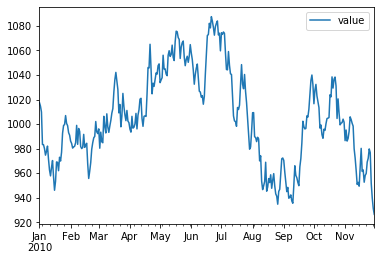

In [38]:
# your code here

shares.plot()

You can see how this very much looks like the exchange rate series you looked at in the lecture!

## Random Walk with a Drift

Repeat the above, but include a drift parameter $c$ of 8 now!

In [39]:
# keep the random seed
drift_shares = pd.DataFrame(start + np.cumsum(errors + 8), index=dates, columns=['value'])

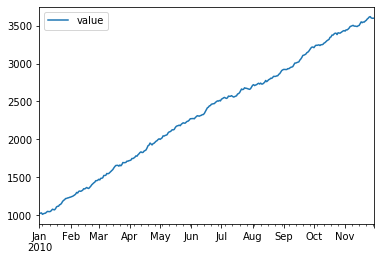

In [40]:
# your code here
drift_shares.plot()

Note that there is a very strong drift here!

## Differencing in a Random Walk model

One important property of the Random Walk model is that a differenced random walk returns a white noise. This is a result of the mathematical formula:

$$Y_t = Y_{t-1} + \epsilon_t$$
which is equivalent to
$$Y_t - Y_{t-1} = \epsilon_t$$

and we know that $\epsilon_t$ is a mean-zero white noise process! 

Plot the differenced time series for the shares time series (no drift).

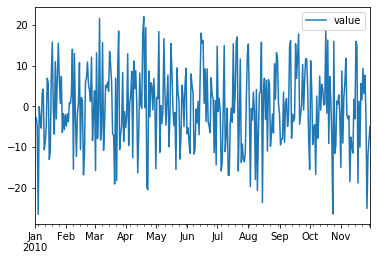

In [43]:
# your code here
shares.diff(periods=1).plot()

This does look a lot like a white noise series!

Plot the differenced time series for the shares time series (with a drift).

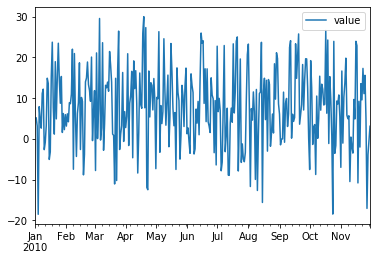

In [44]:
# your code here
drift_shares.diff(periods=1).plot()

In [45]:
drift_shares.diff(periods=1).mean()

value    7.726225
dtype: float64

This is also a white noise series, but what can you tell about the mean?

The mean is equal to the drift $c$, so 8 for this example!

## Summary

Great, you now know how a Random Walk and Moving Average model work!